In [11]:
import rasterio as rio
import pandas as pd
import numpy as  np
import rioxarray

In [26]:
imp = rioxarray.open_rasterio("nlcdimpervious.tif")
# rds = rds.squeeze().drop("spatial_ref").drop("band")
imp.name = "data"
imperv = imp.to_dataframe().reset_index()
imperv.head(2)

,band,y,x,spatial_ref,data
0,1,5.622420e+06,-8.879115e+06,0,127.0
1,1,5.622420e+06,-8.878939e+06,0,127.0


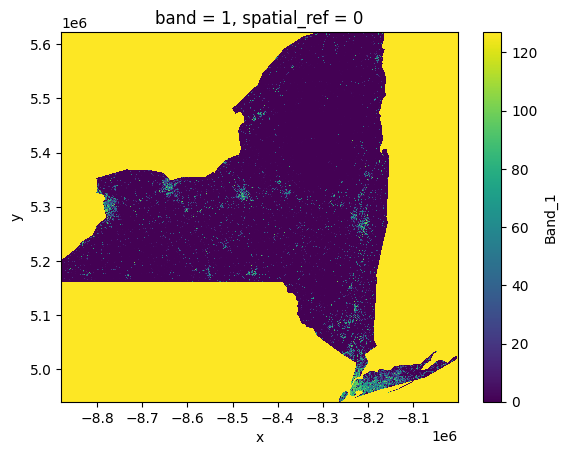

In [27]:
f1 = imp.sel(band=1)
f1.plot.imshow()

In [17]:
rds = rioxarray.open_rasterio("slopedegreev2.tif")
# rds = rds.squeeze().drop("spatial_ref").drop("band")
rds.name = "data"
res = rds.to_dataframe().reset_index()
res.head(2)

,band,y,x,spatial_ref,data
0,1,5.622420e+06,-8.879115e+06,0,0.0
1,1,5.622420e+06,-8.878939e+06,0,0.0


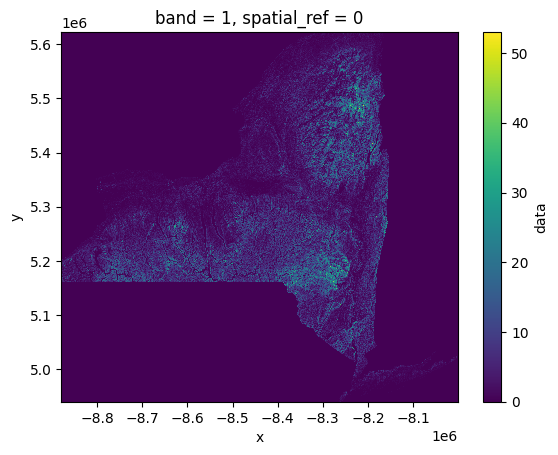

In [25]:
f5 = rds.sel(band=1)
f5.plot.imshow()

In [28]:
lc = rioxarray.open_rasterio("nlcdlandcover2.tif")
# rds = rds.squeeze().drop("spatial_ref").drop("band")
lc.name = "data"
landc = lc.to_dataframe().reset_index()
landc.head(2)

,band,y,x,spatial_ref,data
0,1,5.622420e+06,-8.879115e+06,0,0
1,1,5.622420e+06,-8.878939e+06,0,0


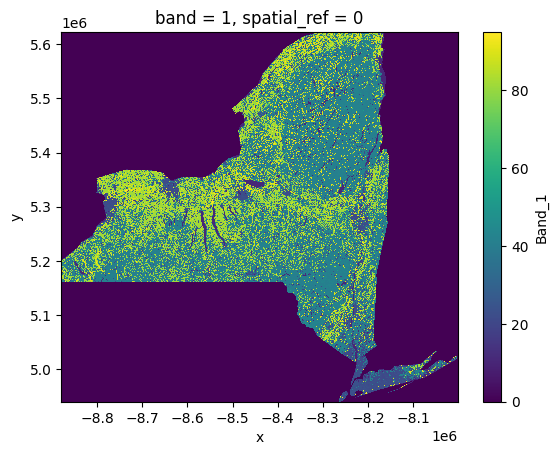

In [29]:
f2 = lc.sel(band=1)
f2.plot.imshow()

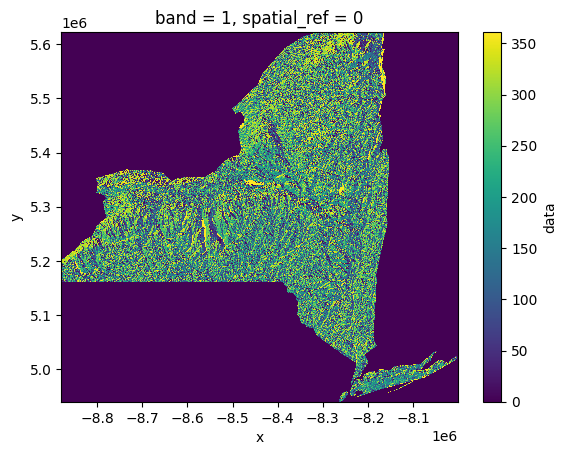

In [30]:
sa = rioxarray.open_rasterio("slopeaspect5.tif")
# rds = rds.squeeze().drop("spatial_ref").drop("band")
sa.name = "data"
slope_as = sa.to_dataframe().reset_index()
slope_as.head(2)

f3 = sa.sel(band=1)
f3.plot.imshow()

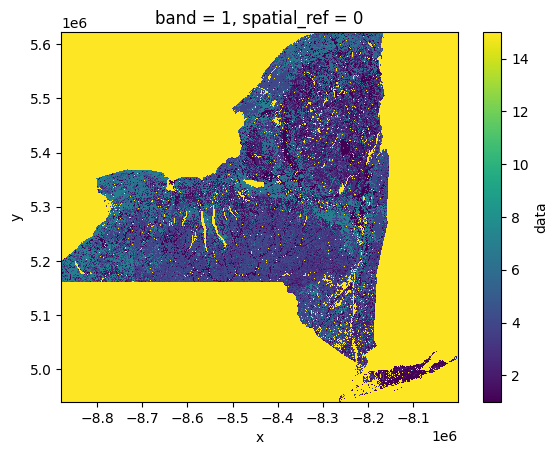

In [31]:
sg = rioxarray.open_rasterio("soilgroup.tif")
# rds = rds.squeeze().drop("spatial_ref").drop("band")
sg.name = "data"
soilgroup = sg.to_dataframe().reset_index()
# soilgroup.head(2)

f4 = sg.sel(band=1)
f4.plot.imshow()

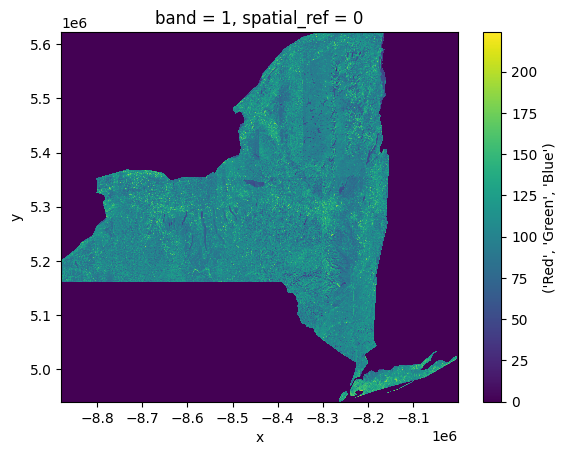

In [32]:
nd = rioxarray.open_rasterio("ndvi2.tif")
# rds = rds.squeeze().drop("spatial_ref").drop("band")
nd.name = "data"
ndvi = nd.to_dataframe().reset_index()
# soilgroup.head(2)

f7 = nd.sel(band=1)
f7.plot.imshow()

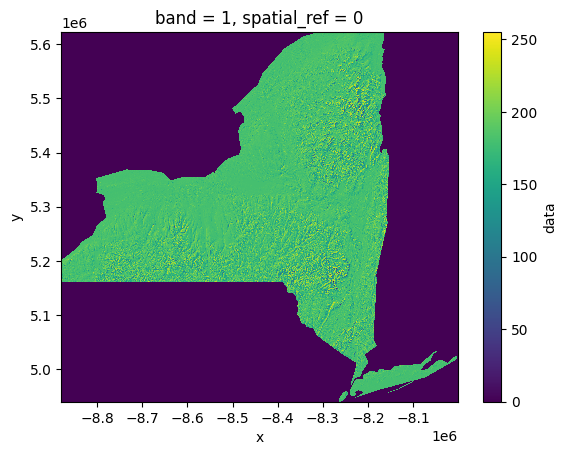

In [33]:
ele = rioxarray.open_rasterio("elevation.tif")
# rds = rds.squeeze().drop("spatial_ref").drop("band")
ele.name = "data"
elevation = ele.to_dataframe().reset_index()
# soilgroup.head(2)

f8 = ele.sel(band=1)
f8.plot.imshow()

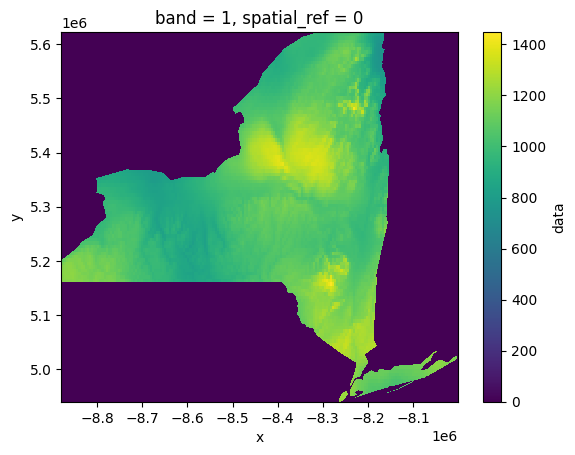

In [34]:
avgpr = rioxarray.open_rasterio("avgprecip.tif")
# rds = rds.squeeze().drop("spatial_ref").drop("band")
avgpr.name = "data"
precip = avgpr.to_dataframe().reset_index()
# soilgroup.head(2)

f9 = avgpr.sel(band=1)
f9.plot.imshow()

In [67]:
print(nd.rio.resolution())
print(avgpr.rio.resolution())
print(lc.rio.resolution())
print(fd.rio.resolution())

(351.46895285151413, -273.09595805162303)
(351.46895285151413, -273.09595805162303)
(175.73447642576005, -136.54797902579998)
(2336.8946333212375, -2338.150325784444)


In [74]:
print(avgpr.rio.crs)
print(nd.rio.crs)
print(ele.rio.crs)
print(lc.rio.crs)
print(fd.rio.crs)
print(sg.rio.crs)
print(rds.rio.crs)
print(imp.rio.crs)
print(sa.rio.crs)

EPSG:3857
EPSG:3857
EPSG:3857
EPSG:3857
EPSG:3857
EPSG:3857
EPSG:3857
EPSG:3857
EPSG:3857


In [77]:
if ele.rio.resolution() == sg.rio.resolution() == rds.rio.resolution() == sa.rio.resolution() == imp.rio.resolution(): 
    print("yay")
    print(ele.rio.resolution())

yay
(175.73447642575707, -136.54797902581151)


In [101]:
# ok now i guess ill resample the ones that are different resolutionn......
from rasterio.enums import Resampling

xres, yres = 175.73447642575707, 136.54797902581151

with rio.open("avgprecip.tif") as dataset:
    scale_factor_x = dataset.res[0]/xres
    scale_factor_y = dataset.res[1]/yres

    profile = dataset.profile.copy()
    # resample data to target shape
    data = dataset.read(
        out_shape=(
            dataset.count,
            int(dataset.height * scale_factor_y),
            int(dataset.width * scale_factor_x)
        ),
        resampling=Resampling.bilinear
    )

    # scale image transform
    transform = dataset.transform * dataset.transform.scale(
        (1 / scale_factor_x),
        (1 / scale_factor_y)
    )
    profile.update({"height": data.shape[-2],
                    "width": data.shape[-1],
                   "transform": transform})

with rio.open("avgprecip_rs.tif", "w", **profile) as dataset:
    dataset.write(data)

In [116]:
# am too tired to write an actual function so am just going to copy paste this over and over.

with rio.open("ndvi2.tif") as dataset:
    scale_factor_x = dataset.res[0]/xres
    scale_factor_y = dataset.res[1]/yres

    profile = dataset.profile.copy()
    # resample data to target shape
    data = dataset.read(
        out_shape=(
            dataset.count,
            int(dataset.height * scale_factor_y),
            int(dataset.width * scale_factor_x)
        ),
        resampling=Resampling.bilinear
    )

    # scale image transform
    transform = dataset.transform * dataset.transform.scale(
        (1 / scale_factor_x),
        (1 / scale_factor_y)
    )
    profile.update({"height": data.shape[-2],
                    "width": data.shape[-1],
                   "transform": transform})

with rio.open("ndvi2_rs.tif", "w", **profile) as dataset:
    dataset.write(data)


In [109]:
with rio.open("density2.tif") as dataset:
    scale_factor_x = dataset.res[0]/xres
    scale_factor_y = dataset.res[1]/yres

    profile = dataset.profile.copy()
    # resample data to target shape
    data = dataset.read(
        out_shape=(
            dataset.count,
            int(dataset.height * scale_factor_y),
            int(dataset.width * scale_factor_x)
        ),
        resampling=Resampling.bilinear
    )

    # scale image transform
    transform = dataset.transform * dataset.transform.scale(
        (1 / scale_factor_x),
        (1 / scale_factor_y)
    )
    profile.update({"height": data.shape[-2],
                    "width": data.shape[-1],
                   "transform": transform})

with rio.open("density2_rs.tif", "w", **profile) as dataset:
    dataset.write(data)

25000000
(175.73447642575707, -136.54797902581151)


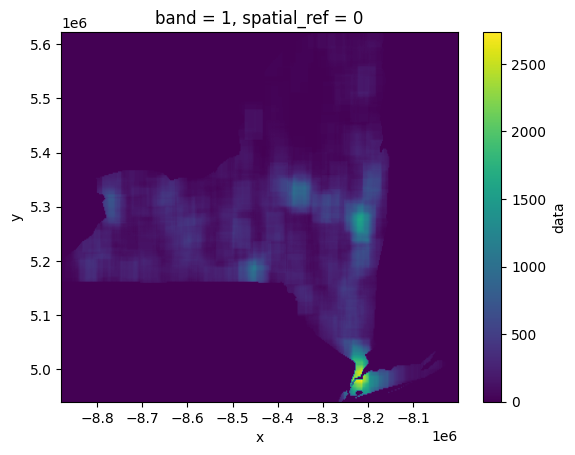

In [114]:
# read back in to check if resizing worked 

rd = rioxarray.open_rasterio("density2_rs.tif")
rd.name = "data"
rs_density = rd.to_dataframe().reset_index()
print(len(rs_density))
print(rd.rio.resolution())
rden = rd.sel(band=1)
rden.plot.imshow()

75000000
(175.73447642575707, -136.54797902581151)


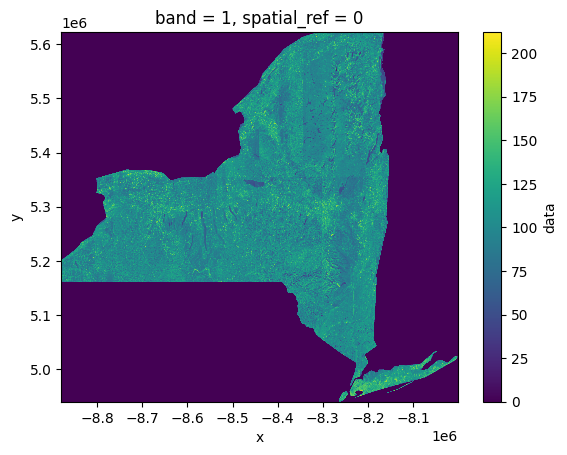

In [117]:
rnd = rioxarray.open_rasterio("ndvi2_rs.tif")
rnd.name = "data"
rs_ndvi = rnd.to_dataframe().reset_index()
print(len(rs_ndvi))
print(rnd.rio.resolution())
rndvi = rnd.sel(band=1)
rndvi.plot.imshow()

25000000
(175.73447642575707, -136.54797902581151)


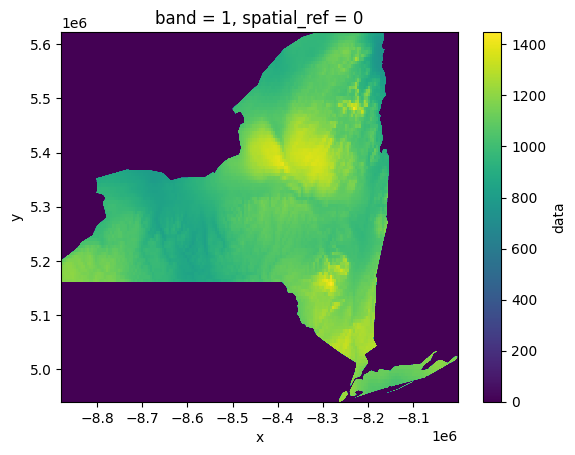

In [120]:
ap = rioxarray.open_rasterio("avgprecip_rs.tif")
ap.name = "data"
rs_pr = ap.to_dataframe().reset_index()
print(len(rs_pr))
print(ap.rio.resolution())
rspre = ap.sel(band=1)
rspre.plot.imshow()

In [133]:
rs_ndvi[rs_ndvi]

band             int64
y              float64
x              float64
spatial_ref      int64
data             uint8
dtype: object

In [126]:
rs_density['flood_den'] = rs_density['data']
soilgroup['soilgroup'] = soilgroup['data']
landc['landcover'] = landc['data']
res['slope_deg'] = res['data']
imperv['impervious'] = imperv['data']
elevation['elevation'] = elevation['data']
slope_as['slope_as'] = slope_as['data']
rs_pr['ann_prcp'] = rs_pr['data']

In [128]:
rs_density.drop(axis=1,columns=['spatial_ref', 'data', 'y','x', 'band'], inplace=True)

In [134]:
landc.drop(axis=1,columns=['spatial_ref', 'data', 'y','x', 'band'], inplace=True)
res.drop(axis=1,columns=['spatial_ref', 'data', 'y','x', 'band'], inplace=True)
imperv.drop(axis=1,columns=['spatial_ref', 'data', 'y','x', 'band'], inplace=True)
soilgroup.drop(axis=1,columns=['spatial_ref', 'data', 'y','x', 'band'], inplace=True)
slope_as.drop(axis=1,columns=['spatial_ref', 'data', 'y','x', 'band'], inplace=True)
rs_pr.drop(axis=1,columns=['spatial_ref', 'data', 'y','x', 'band'], inplace=True)
elevation.drop(axis=1,columns=['spatial_ref', 'data', 'band'], inplace=True)

In [ ]:
floodset =  pd.concat([elevation, landc, res, imperv, soilgroup, slope_as, rs_pr, rs_density], axis = 1)